# Moth-Flame Optimization (MFO)
Demo on Google Colab

This notebook demonstrates a simplified implementation of the
Moth-Flame Optimization algorithm applied to the Sphere function.



In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

POPULATION_SIZE = 50
DIMENSION = 30
MAX_ITERATIONS = 100
BOUNDS = (-10, 10)
NUM_FLAMES = 5

In [10]:
def sphere_function(x):
    return np.sum(x**2, axis=1)
test = np.array([[1, 2, 3]])
print("Sphere test result:", sphere_function(test))

Sphere test result: [14]


In [11]:
def update_flames(moths, fitness, num_flames):
    best_indices = np.argsort(fitness)[:num_flames]
    return moths[best_indices]

def spiral_update(moths, flames):
    new_moths = moths.copy()
    for i in range(len(moths)):
        flame = flames[np.random.randint(len(flames))]
        new_moths[i] = moths[i] + 0.1 * (flame - moths[i])
    return new_moths

In [12]:
def moth_flame_optimization():
    moths = np.random.uniform(BOUNDS[0], BOUNDS[1],
                              (POPULATION_SIZE, DIMENSION))
    fitness = sphere_function(moths)

    best_fitness_history = []

    for iteration in range(MAX_ITERATIONS):
        flames = update_flames(moths, fitness, NUM_FLAMES)
        moths = spiral_update(moths, flames)
        moths = np.clip(moths, BOUNDS[0], BOUNDS[1])
        fitness = sphere_function(moths)
        best_fitness_history.append(np.min(fitness))

    best_idx = np.argmin(fitness)
    return moths[best_idx], fitness[best_idx], best_fitness_history

In [13]:
best_solution, best_fitness, history = moth_flame_optimization()

print("Best Fitness Found:", best_fitness)

Best Fitness Found: 4.713710875585035


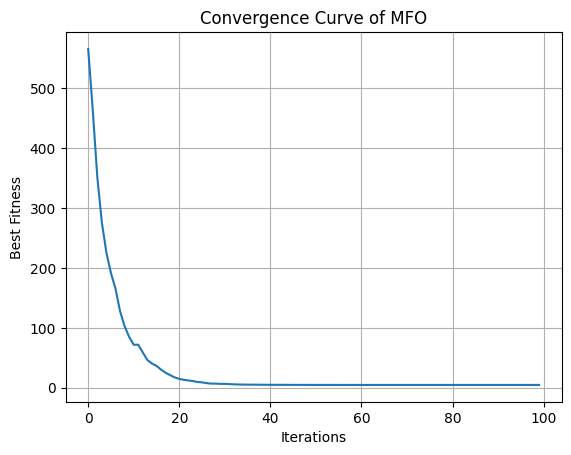

In [14]:
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
plt.title("Convergence Curve of MFO")
plt.grid(True)
plt.show()